# Data cleaning for sprint and standard race
## Sprint and standard race are divided in male and female
We need to cleanind data:
* divide the category for analysis (the division is for élite and Age Group category)
* clean the outliner

# ⚠️⚠️⚠️
*After the first script, we denote some differences between males and females in terms of time and other things, also the difference in time between sprint and standard distance is obvious. Every file is structured for a specific gender and distance to create the correct division for machine learning elaboration*
# ⚠️⚠️⚠️

This operation is valid for the 4 file (`sprint_female.csv`, `sprint_male.csv`, `standard_male.csv`, `standard_female.csv`),\
but every file are cleaned differently

In this file we analyze: <ins>`standard_female.csv`</ins>

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

To open the files use the name of the .csv file that you want to open\
The cleaning operation is the same for all file\
Remember to change the name of the file at the end of the notebook to have the correct file name

In [2]:
data_race = pd.read_csv("standard_female.csv", low_memory=False)
race = pd.DataFrame(data_race)

In [3]:
race.head()

,athlete_id,prog_id,event_id,athlete_gender,athlete_country_id,athlete_yob,athlete_noc,prog_name,prog_date,cat_name_categories,...,t1_position,bike_position,t2_position,run_position,final_position,swim_t1_position,swim_t1_bike_position,swim_t1_bike_t2_position,prog_date_year,age_at_race
0,5530,1789,4521,female,111,1981,AUS,Elite Women,2005-07-23,World Cup,...,1.0,3.0,1.0,1.0,1.0,3.0,3.0,3.0,2005,24
1,5517,1789,4521,female,111,1982,AUS,Elite Women,2005-07-23,World Cup,...,2.0,2.0,2.0,2.0,2.0,4.0,1.0,2.0,2005,23
2,5484,1789,4521,female,293,1970,USA,Elite Women,2005-07-23,World Cup,...,3.0,5.0,3.0,5.0,3.0,2.0,5.0,5.0,2005,35
3,5399,1789,4521,female,293,1975,USA,Elite Women,2005-07-23,World Cup,...,4.0,1.0,4.0,8.0,4.0,5.0,2.0,1.0,2005,30
4,5366,1789,4521,female,293,1969,USA,Elite Women,2005-07-23,World Cup,...,5.0,4.0,5.0,11.0,5.0,1.0,4.0,4.0,2005,36


In [4]:
race.shape

(36992, 61)

Find the unique athlete categories 

In [5]:
category = race["prog_name"].unique()
category

array(['Elite Women', 'U23 Women', 'Elite Men', '50-54 Female AG',
       '30-34 Female AG', '45-49 Female AG', '20-24 Female AG',
       '25-29 Female AG', '35-39 Female AG', '40-44 Female AG',
       '55-59 Female AG', '18-19 Female AG', '60-64 Female AG',
       '65-69 Female AG', 'Junior Women', "Women's AG", "Women's PT4",
       'Youth Women', "Women's PT1", "Women's PT5", 'Elite and U23 Women',
       'PTWC Women', 'PTS4 Women', 'PTS5 Women', 'PTVI Women',
       'Masters Women V1', 'Masters Women V3', 'Junior Women A',
       'Junior Women B', 'Overall Female', 'Masters Women V2',
       '16-19 Female AG', 'Clydesdale Female U39', 'Clydesdale Female',
       'PTS2 Women', 'U17 Women', 'U15 Women', 'U13 Women',
       '16-19 Female AG Sprint', '20-24 Female AG Sprint',
       '25-29 Female AG Sprint', '35-39 Female AG Sprint',
       '40-44 Female AG Sprint', '15-19 Female AG Super Sprint',
       '20-24 Female AG Super Sprint', '25-29 Female AG Super Sprint',
       '30-34 Fema

In [6]:
category.shape

(60,)

Take the column with a specific athlete category.\
In this case we take the youth, junior, U23, and élite category

this is the name of the category extracted from the previous array:\
'Elite Women', 'U23 Women', 'Elite Men', '50-54 Female AG',
'30-34 Female AG', '45-49 Female AG', '20-24 Female AG',
'25-29 Female AG', '35-39 Female AG', '40-44 Female AG',
'55-59 Female AG', '18-19 Female AG', '60-64 Female AG',
'65-69 Female AG', 'Junior Women', "Women's AG", "Women's PT4",
'Youth Women', "Women's PT1", "Women's PT5", 'Elite and U23 Women',
'PTWC Women', 'PTS4 Women', 'PTS5 Women', 'PTVI Women',
'Masters Women V1', 'Masters Women V3', 'Junior Women A',
'Junior Women B', 'Overall Female', 'Masters Women V2',
'16-19 Female AG', 'Clydesdale Female U39', 'Clydesdale Female',
'PTS2 Women', 'U17 Women', 'U15 Women', 'U13 Women',
'16-19 Female AG Sprint', '20-24 Female AG Sprint',
'25-29 Female AG Sprint', '35-39 Female AG Sprint',
'40-44 Female AG Sprint', '15-19 Female AG Super Sprint',
'20-24 Female AG Super Sprint', '25-29 Female AG Super Sprint',
'30-34 Female AG Super Sprint', '35-39 Female AG Super Sprint',
'40-44 Female AG Super Sprint', '45-49 Female AG Super Sprint',
'50-54 Female AG Super Sprint', '55-59 Female AG Super Sprint',
'60-64 Female AG Super Sprint', '65-69 Female AG Super Sprint',
'70-74 Female AG Super Sprint', '75-79 Female AG Super Sprint',
'80-84 Female AG Super Sprint', 'PTS3 Women',
'85-89 Female AG Super Sprint', 'Elite Women Sprint Distance'

To filter only the final result we delete the repecage or semifinal o similar categories

Use only this category

In [7]:
category_name = ['Elite Women', 'U23 Women', 'Junior Women']

In [8]:
elite_category = race.loc[race['prog_name'].isin(category_name)]
elite_category
elite_category.value_counts('prog_name')


prog_name
Elite Women     28933
U23 Women         708
Junior Women      626
dtype: int64

In [9]:
elite_category.shape

(30267, 61)

create a chart to visualize the result

<function matplotlib.pyplot.show(close=None, block=None)>

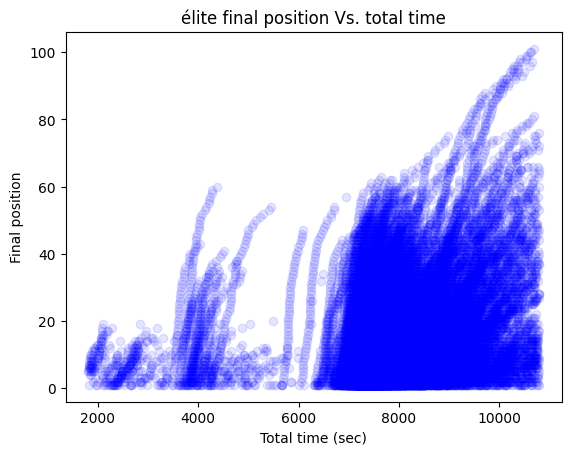

In [10]:
plt.scatter(race["tempo_totale_sec"], race["final_position"], c="blue", alpha=0.1)
plt.title("élite final position Vs. total time")
plt.xlabel("Total time (sec)")
plt.ylabel("Final position")
plt.show

We need to find out if the age is positive and decide the minimum age

In [11]:
age = race[['age_at_race']].value_counts()
age

age_at_race
 23            2159
 24            2153
 21            2103
 25            2083
 22            2061
               ... 
 81               1
 80               1
-14               1
 74               1
 86               1
Length: 94, dtype: int64

The age had an outliner, delete the age below zero

In [12]:
age = race.drop(race.loc[race['age_at_race'] <= 0].index, inplace=True)

create a scatter plot to visualize it

<function matplotlib.pyplot.show(close=None, block=None)>

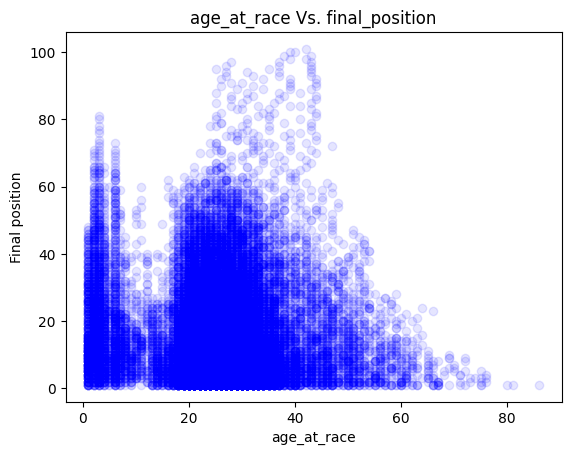

In [13]:
plt.scatter(race["age_at_race"], race["final_position"], c="blue", alpha=0.1)
plt.title("age_at_race Vs. final_position")
plt.xlabel("age_at_race")
plt.ylabel("Final position")
plt.show

We need to decide what is the minimum time for the sprint and standard distance.\
Normally, in an optimal race, the sprint distance it's not below 40 minutes and the standard is 1 hour and 30 minutes.\
Using a scatter plot with age and total time in seconds we know the fonal time of the race.

<function matplotlib.pyplot.show(close=None, block=None)>

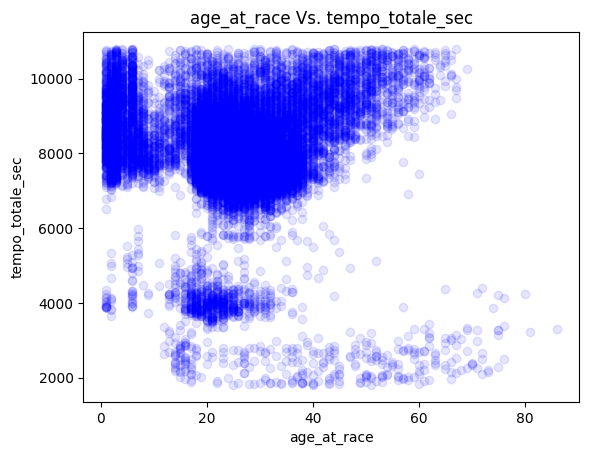

In [14]:
plt.scatter(race["age_at_race"], race["tempo_totale_sec"], c="blue", alpha=0.1)
plt.title("age_at_race Vs. tempo_totale_sec")
plt.xlabel("age_at_race")
plt.ylabel("tempo_totale_sec")
plt.show

Find the number of the participants in every category of race\
Visualize the total time in every race category

In [15]:
type_of_race = race["cat_name_categories"].value_counts()
type_of_race

Continental Cup              11360
World Cup                     7648
World Championships           4459
Race                          3042
World Championship Series     2348
Continental Championships     1936
Recognised Event               713
Major Games                    458
Age-Group Event                378
Recognised Games               277
Regional Championships         156
World Paratriathlon Event      113
Name: cat_name_categories, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

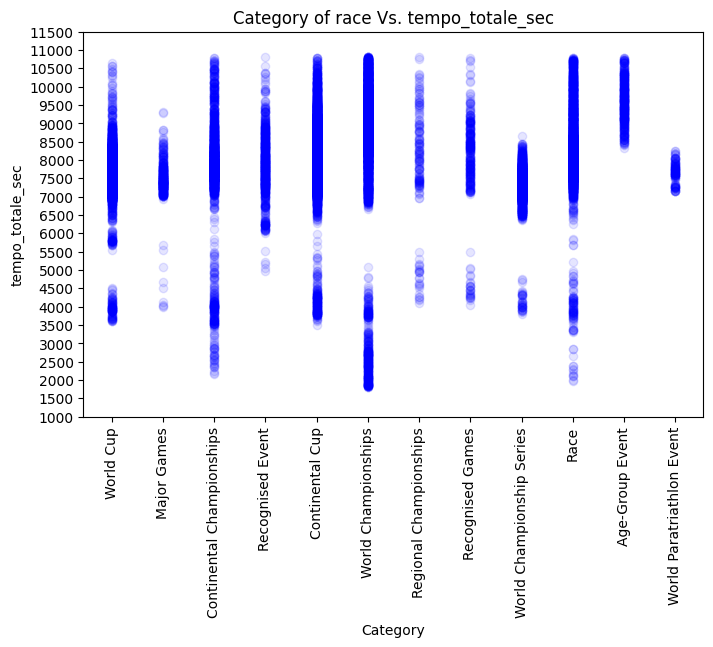

In [16]:
plt.figure(figsize=(8, 5))
plt.scatter(race["cat_name_categories"], race["tempo_totale_sec"], c="blue", alpha=0.1)
plt.title("Category of race Vs. tempo_totale_sec")
plt.xlabel("Category")
plt.ylabel("tempo_totale_sec")
plt.xticks(rotation=90)
plt.yticks(range(1000, 12000, 500))
plt.show

We need to delete some type of race that are non included in the élite program


In [17]:
type_of_race = race["cat_name_categories"].unique()
type_of_race

array(['World Cup', 'Major Games', 'Continental Championships',
       'Recognised Event', 'Continental Cup', 'World Championships',
       'Regional Championships', 'Recognised Games',
       'World Championship Series', 'Race', 'Age-Group Event',
       'World Paratriathlon Event'], dtype=object)

From the category name colum delete the race that not included in a élite program like age-group event and paratriathlon race.\
The generic name 'Race' is the national championship, we decide to delete from the analisys\
The list of the category is:

'World Cup', 'Major Games', 'Continental Championships',\
'Recognised Event', 'Continental Cup', 'World Championships',\
'Regional Championships', 'Recognised Games',\
'World Championship Series', 'Race', 'Age-Group Event',\
'World Paratriathlon Event'

In [18]:
race_type = ['Race', 'Age-Group Event','World Paratriathlon Event']
race = race[~race['cat_name_categories'].isin(race_type)]

In [19]:
race["cat_name_categories"].unique()

array(['World Cup', 'Major Games', 'Continental Championships',
       'Recognised Event', 'Continental Cup', 'World Championships',
       'Regional Championships', 'Recognised Games',
       'World Championship Series'], dtype=object)

In [20]:
race["cat_name_categories"].value_counts()

Continental Cup              11360
World Cup                     7648
World Championships           4459
World Championship Series     2348
Continental Championships     1936
Recognised Event               713
Major Games                    458
Recognised Games               277
Regional Championships         156
Name: cat_name_categories, dtype: int64

A simple evaluation of the total time\
The minimum value (1799) was found, remember that we deleted the time below 1800 seconds (30 minutes) during the initial cleaning.\
Now we need to decide what is the minimum time to start the analysis for standard and sprint races, for male and female

In [21]:
summmary_time = race[["tempo_totale_sec"]].describe()
summmary_time

,tempo_totale_sec
count,29355.000000
mean,7850.723386
std,1106.858259
min,1805.000000
25%,7415.000000
50%,7764.000000
75%,8310.500000
max,10799.000000


In [22]:
limiti_total_time = race.drop(race.loc[race['tempo_totale_sec'] <= 0].index, inplace=True)

Define better the visualization to decide the lower limit to delete the data\
set the red line to visualize the time. \
Use the variable *time_limit* to change dinamically the value

<function matplotlib.pyplot.show(close=None, block=None)>

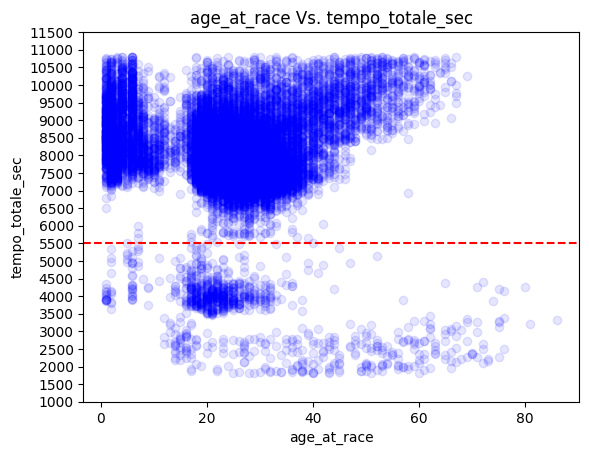

In [23]:
# set a value in second to draw a line on the chart to set the time limit
time_limit = 5500

plt.scatter(race["age_at_race"], race["tempo_totale_sec"], c="blue", alpha=0.1)
plt.title("age_at_race Vs. tempo_totale_sec")
plt.xlabel("age_at_race")
plt.ylabel("tempo_totale_sec")
plt.yticks(range(1000, 12000, 500))
plt.axhline(y=time_limit, color='r', linestyle='--')
plt.show

Watching the chart it's important to view the age at race of the athlete.\
Some athletes are over 40 years old.\
Normally the élite athletes don't have age over 40 (in rare cases)\
what is the age limit for the anlisys?

In [24]:
athlete_age = race[["age_at_race"]].describe()
athlete_age

,age_at_race
count,29355.000000
mean,25.021938
std,9.581962
min,1.000000
25%,21.000000
50%,25.000000
75%,29.000000
max,86.000000


Drop the athlete that have a age at race over 40 years old

In [25]:
age_limit = race.drop(race.loc[race['age_at_race'] > 40].index, inplace=True)


In [26]:
athlete_age = race[["age_at_race"]].describe()
athlete_age

,age_at_race
count,27982.000000
mean,23.820956
std,7.929668
min,1.000000
25%,21.000000
50%,25.000000
75%,29.000000
max,40.000000


Create a new chart to visualize the data with an age limit\
During the data cleaning some athletes don't have the years of birth and we decided to set default the year of birth at year 2000. 


<function matplotlib.pyplot.show(close=None, block=None)>

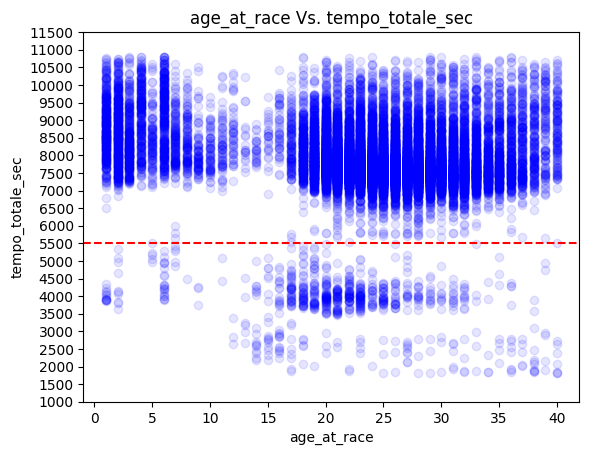

In [27]:
# set a value in second to draw a line on the chart to set the time limit
time_limit_down = 5500

plt.scatter(race["age_at_race"], race["tempo_totale_sec"], c="blue", alpha=0.1)
plt.title("age_at_race Vs. tempo_totale_sec")
plt.xlabel("age_at_race")
plt.ylabel("tempo_totale_sec")
plt.yticks(range(1000, 12000, 500))
plt.axhline(y=time_limit_down, color='r', linestyle='--')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

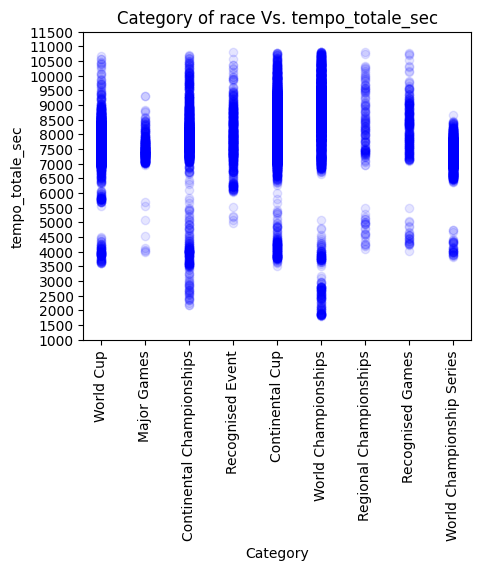

In [28]:
plt.figure(figsize=(5, 4))
plt.scatter(race["cat_name_categories"], race["tempo_totale_sec"], c="blue", alpha=0.1)
plt.title("Category of race Vs. tempo_totale_sec")
plt.xlabel("Category")
plt.ylabel("tempo_totale_sec")
plt.xticks(rotation=90)
plt.yticks(range(1000, 12000, 500))
plt.show

In the first chart we can observe the age at race sometime is zero.\
We decide to use all age for the analysis\
In the second chart we can observe all type of race and the total time
<hr/>

Now we need to decide the time limit for the sprint and standard distances\
5500 seconds is 1 hour and 31 minutes and 40 seconds \
For a standard distance of 1 hour and half it's a very low time to complete the race.\
Sometimes the race was cut (for example in swim split) because the water temperature was to low for swimming.\
The swim distance from 1.500 meters is reduced to 750 meters or below\. 
In standard distance we decided to drop all the values below 5300 seconds

In [29]:
drop_time_limit = race.drop(race.loc[race['tempo_totale_sec'] < 5500].index, inplace=True)

Visualize the result of the operation

<function matplotlib.pyplot.show(close=None, block=None)>

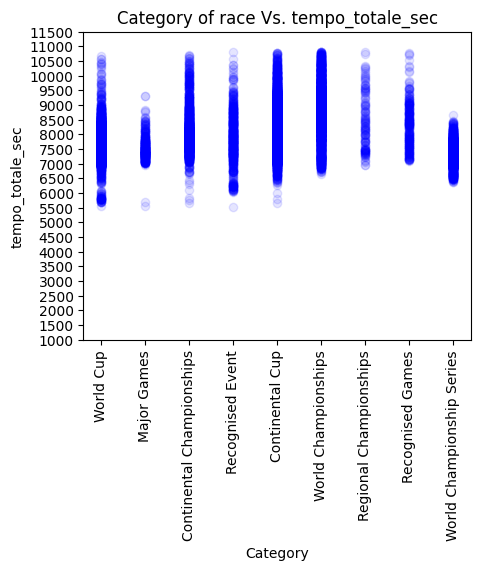

In [30]:
plt.figure(figsize=(5, 4))
plt.scatter(race["cat_name_categories"], race["tempo_totale_sec"], c="blue", alpha=0.1)
plt.title("Category of race Vs. tempo_totale_sec")
plt.xlabel("Category")
plt.ylabel("tempo_totale_sec")
plt.xticks(rotation=90)
plt.yticks(range(1000, 12000, 500))
plt.show

For a better understanding of the data, we create a chart with the date and total time\
After the first look at the chart we observe that the total time, sometimes is elevated.\
For a standard distance time over 9000 seconds (2 hours and 30 minutes) it's a good time for an élite athlete.\
After that we decided to delete all the time over 9000 seconds

<function matplotlib.pyplot.show(close=None, block=None)>

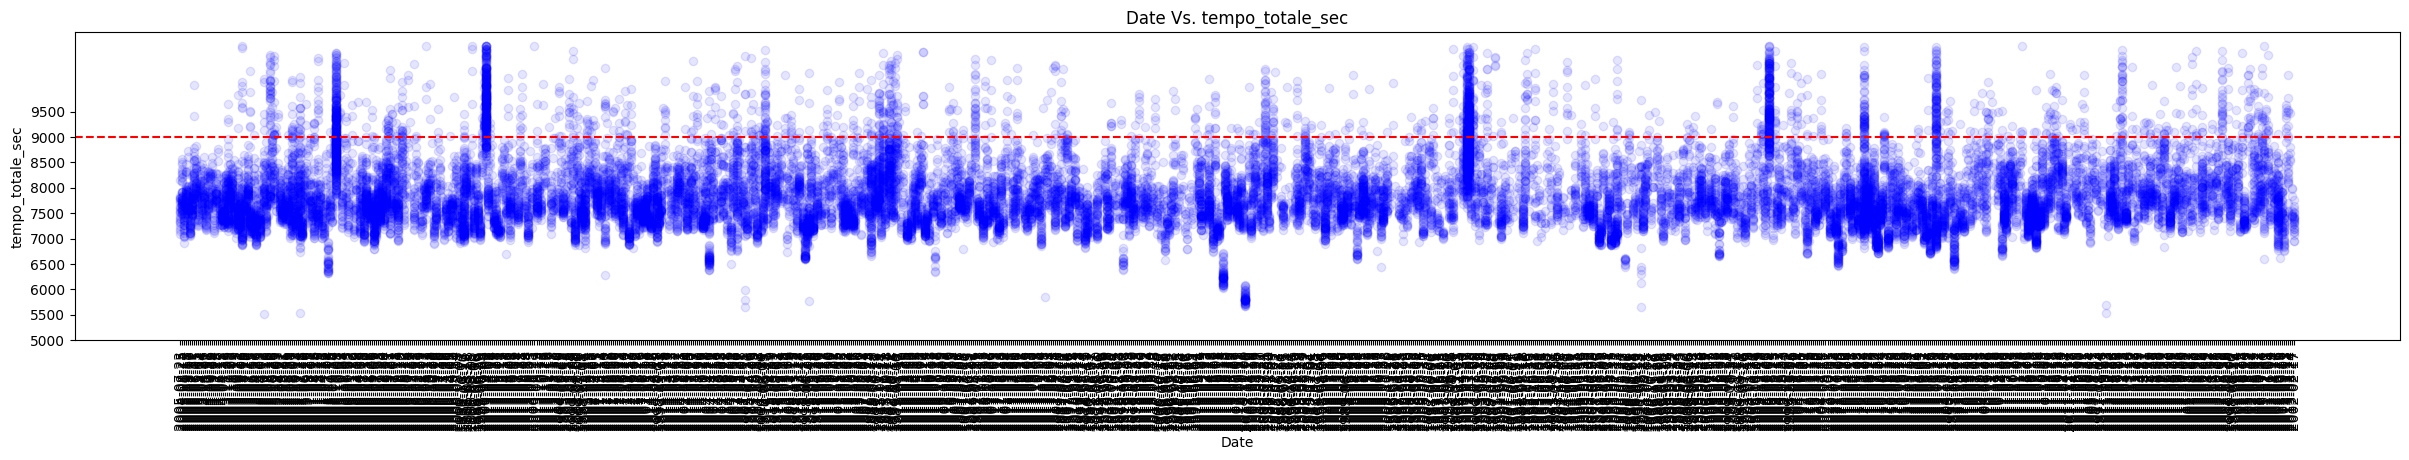

In [31]:
time_limit_up = 9000

plt.figure(figsize=(30, 4))
plt.scatter(race["event_date"], race["tempo_totale_sec"], c="blue", alpha=0.1)
plt.title("Date Vs. tempo_totale_sec")
plt.xlabel("Date")
plt.ylabel("tempo_totale_sec")
plt.xticks(rotation=90)
plt.yticks(range(5000, 10000, 500))
plt.axhline(y=time_limit_up, color='r', linestyle='--')
plt.show

In [32]:
drop_time_limit_up = race.drop(race.loc[race['tempo_totale_sec'] > 9000].index, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

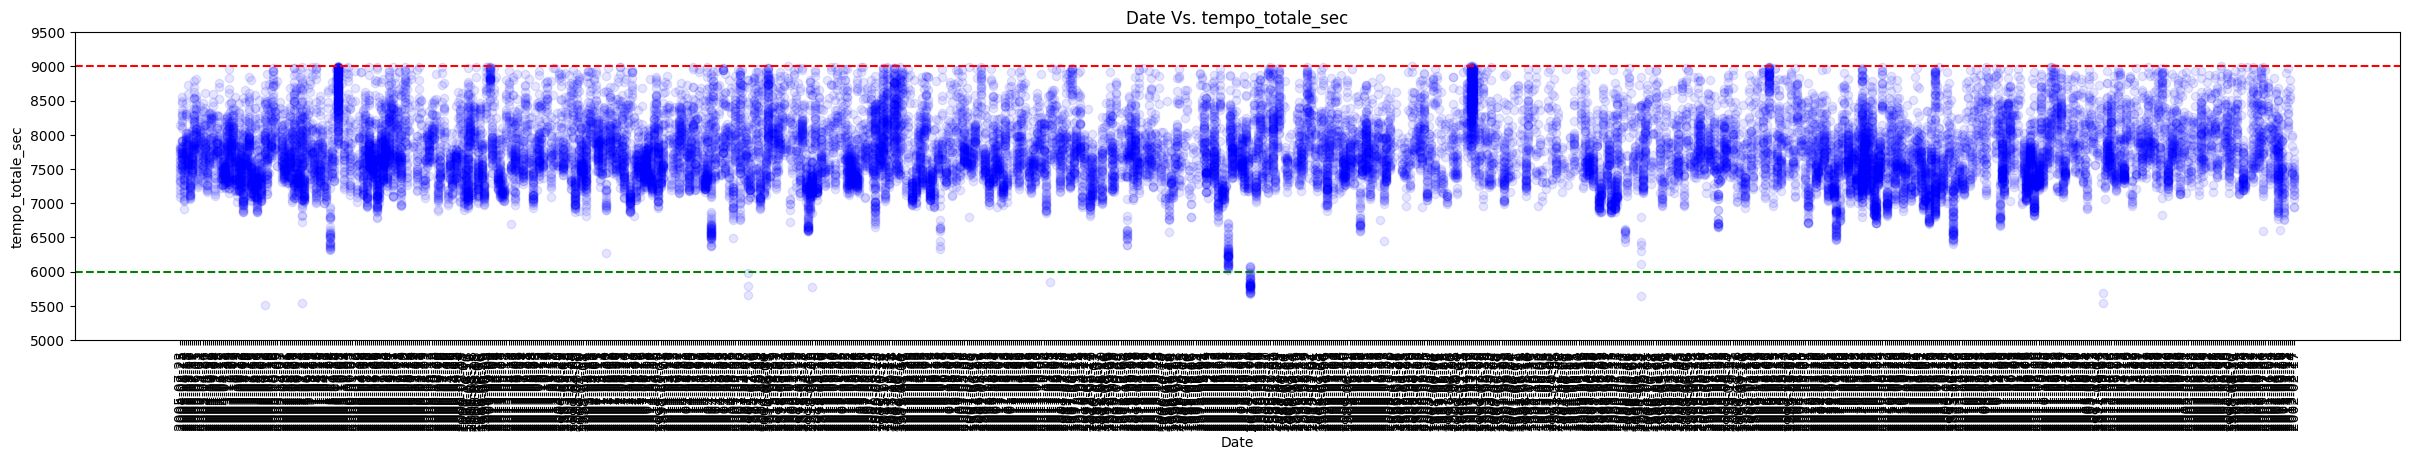

In [33]:
time_limit_up = 9000
time_limit_down = 6000

plt.figure(figsize=(30, 4))
plt.scatter(race["event_date"], race["tempo_totale_sec"], c="blue", alpha=0.1)
plt.title("Date Vs. tempo_totale_sec")
plt.xlabel("Date")
plt.ylabel("tempo_totale_sec")
plt.xticks(rotation=90)
plt.yticks(range(5000, 10000, 500))
plt.axhline(y=time_limit_up, color='r', linestyle='--')
plt.axhline(y=time_limit_down, color='g', linestyle='--')
plt.show

For a fine tuning of the limit of the time (below and over) for a standard distance we can re-set the down limit to 6000 second (1 hour and 40 minutes)
<p>Enlarging the chart we denote that the upper time probably is too high for a better machine learning calculus,
still we decided to modify the upper limit while creating the machine learning model and not now
to create a first model and then modify the time limit to try if the time limit creates a different model.<p>

In [34]:
drop_time_limit_up = race.drop(race.loc[race['tempo_totale_sec'] < 6000].index, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

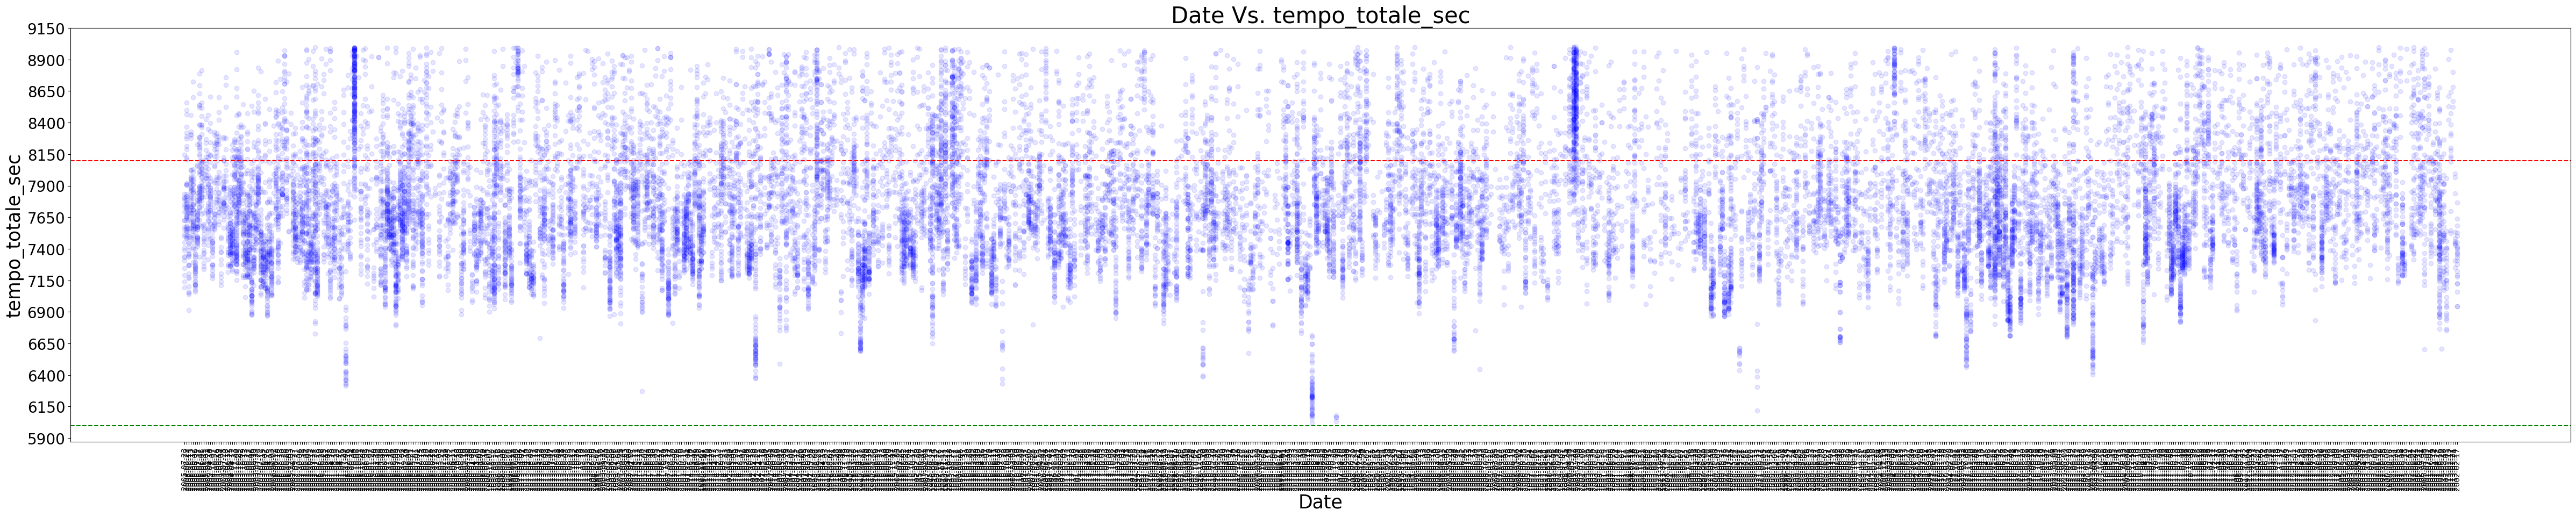

In [35]:
time_limit_up = 8100
time_limit_down = 6000

plt.figure(figsize=(60, 10))
plt.scatter(race["event_date"], race["tempo_totale_sec"], c="blue", alpha=0.1)
plt.title("Date Vs. tempo_totale_sec", fontsize=30)
plt.xlabel("Date", fontsize=25)
plt.ylabel("tempo_totale_sec", fontsize=25)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(range(5900, 9250, 250), fontsize=20)
plt.axhline(y=time_limit_up, color='r', linestyle='--')
plt.axhline(y=time_limit_down, color='g', linestyle='--')
plt.show

Now we need to create two different files
* Train file: the file used to train the machine learning model
* Test file: the file used to test the machine learning model 
Before create this files we need to know the content of the column (for example the number of the race in every type of race),\
and delete the duplicated column ( like date event) and non numeric column (like type of race)


In [36]:
# counting the number of the race in different type of race for the paper
race_type_count = race["cat_name_categories"].value_counts()
race_type_count

Continental Cup              10245
World Cup                     7429
World Championship Series     2303
World Championships           1814
Continental Championships     1565
Recognised Event               653
Major Games                    446
Recognised Games               198
Regional Championships          92
Name: cat_name_categories, dtype: int64

To know the columns to delete, you can open the file with a text editor\
<b>(do not use excel because transform the data in different format)<b/>

In [37]:
# find the name of the column in the dataset
columns_name = race.columns.tolist()
columns_name

['athlete_id',
 'prog_id',
 'event_id',
 'athlete_gender',
 'athlete_country_id',
 'athlete_yob',
 'athlete_noc',
 'prog_name',
 'prog_date',
 'cat_name_categories',
 'cat_id_categories',
 'cat_parent_id_categories',
 'cat_name_specification_first',
 'cat_id_specification_first',
 'cat_parent_id_specification_first',
 'cat_name_specification_second',
 'cat_id_specification_second',
 'cat_parent_id_specification_second',
 'event_date',
 'event_country_noc',
 'event_region_id',
 'event_country_id',
 'event_region_name',
 'position',
 'start_num',
 'tempo_nuoto_sec',
 'tempo_T1_sec',
 'tempo_ciclismo_sec',
 'tempo_T2_sec',
 'tempo_corsa_sec',
 'tempo_totale_sec',
 'swim_T1',
 'swim_T1_bike',
 'swim_T1_bike_T2',
 'bike_T2',
 'swim_distance',
 'bike_distance',
 'run_distance',
 'percentage_swim',
 'percentage_t_1',
 'percentage_bike',
 'percentage_t_2',
 'percentage_run',
 'swim_T1_percentage',
 'swim_T1_bike_percentage',
 'swim_T1_bike_T2_percentage',
 'bike_T2_percentage',
 'avg_swim_vel_

In [38]:
# find the coulumns type of data in the dataset
columns_name = race.dtypes
columns_name.tolist()

[dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype

this is the list of the header of the column:\
'athlete_id', 'prog_id', 'event_id', 'athlete_gender', 'athlete_country_id', 'athlete_yob', 'athlete_noc',
 'prog_name', 'prog_date', 'cat_name_categories', 'cat_id_categories', 'cat_parent_id_categories', 'cat_name_specification_first', 'cat_id_specification_first', 'cat_parent_id_specification_first',
 'cat_name_specification_second', 'cat_id_specification_second', 'cat_parent_id_specification_second',
 'event_date', 'event_country_noc', 'event_region_id', 'event_country_id', 'event_region_name',
 'position', 'start_num', 'tempo_nuoto_sec', 'tempo_T1_sec', 'tempo_ciclismo_sec', 'tempo_T2_sec',
 'tempo_corsa_sec', 'tempo_totale_sec', 'swim_T1', 'swim_T1_bike', 'swim_T1_bike_T2', 'bike_T2',
 'swim_distance', 'bike_distance', 'run_distance', 'percentage_swim', 'percentage_t_1', 'percentage_bike',
 'percentage_t_2', 'percentage_run', 'swim_T1_percentage', 'swim_T1_bike_percentage', 'swim_T1_bike_T2_percentage',
 'bike_T2_percentage', 'avg_swim_vel_m/s', 'avg_bike_vel_m/s', 'avg_run_vel_m/s ', 'swim_position', 't1_position',
 'bike_position', 't2_position', 'run_position', 'final_position', 'swim_t1_position', 'swim_t1_bike_position',
 'swim_t1_bike_t2_position', 'prog_date_year', 'age_at_race'

we decided to eliminate these columns and the reason:

* `athlete_id`: it's the ID's of the athlete  it's not important for the analisys
* `prog_id`: the program ID's it's not important for the analisys
*  `event_id`: the event ID's it`s not important for the analisys
* `athlete_gender`: we divided the gender in the previous cleaning
* `athlete_yob`: we used this element in the previous cleaning
* `athlete_noc`: the nationlity of the athlete it's not important for the analisys
* `athlete_country_id`: the ID's of the athlete it's not important for the analisys
* `prog_name`: is the name of the category of the athletes (élite or age-group) we delete all different prog name to have only élite
* `prog_date`: it's a duplicate of the event_date column
* `cat_name_categories`: it's a text and identify the level of the race (i.e. world cup etc.)
* `cat_id_categories`:  it's a number that identify the cat_name_categories
* `cat_parent_id_categories`: it's a code and identify the cat_name_categories. 
* `cat_name_specification_first`:it's a text and identify the type of race of the race (i.e. triathlon, duathlon etc ), we devide the distance (spirint and standard) in the previous cleaning
* `cat_id_specification_first`: it's a code and identify the cat_name_specification_first. 
* `cat_parent_id_specification_first`: it's a code and identify the sub cat_name_specification_first. 
* `cat_name_specification_second`: it's a text and identify the distance of the race (i.e. standard, sprint etc ), we devide the distance (spirint and standard) in the previous cleaning
* `cat_id_specification_second`: it's a code and identify the cat_name_specification_second. 
* `cat_parent_id_specification_second`: it's a code and identify the sub cat_name_specification_second. 
* `event_country_noc`: it's a text and identify the name of the nation 
* `event_region_id`: it's the numeric ID's of the event_country_noc
* `event_country_id`: it's a text to identify the name of the nation of the race
* `event_region_name`: it's the numeric ID's of the event_region_name
* `prog_date_year`: it' a colums used to calculate the age_at_race
* `final_position`: this is a final position calculated, but we have this information from the original data
* `start_num`: it's the starting number of the athlete

In [39]:
surplus_columns = ["athlete_id", "prog_id", "event_id", "athlete_gender", "athlete_yob", "athlete_noc", "athlete_country_id", 
                   "prog_name", "prog_date", "cat_name_categories", "cat_id_categories", "cat_parent_id_categories", 
                   "cat_name_specification_first", "cat_id_specification_first", "cat_parent_id_specification_first",
                   "cat_name_specification_second", "cat_id_specification_second", "cat_parent_id_specification_second",
                   "event_country_noc", "event_region_id", "event_country_id", "event_region_name","final_position", "start_num"] 

In [40]:
standard_male = race.drop(surplus_columns, axis=1, inplace=True)
standard_male

To divide the train test data we need to decide the percentage or the date from - to for the train and the rest for the test.\
The final purpose of the study is to determine (with a good approximation) the total time of the race in the future.\
The date we choose to divide the train/test data is the Olympic event in Tokyo 2021. Before 2021-08-1 it's a train file, after it's a test file.

In [41]:
# find the number of the event before 2021-08-01 and the number of the race after that date
total_number_of_row = len(race)
train_standard_female = len(race[race['event_date'] < '2021-08-01'])
test_standard_female = len(race[race['event_date'] > '2021-08-01'])
percentage_train_test = (train_standard_female / total_number_of_row) * 100
print(f"Total number of row: {total_number_of_row}")
print(f"Total row of train: {train_standard_female}")
print(f"Total row of test: {test_standard_female}")
print(f"Percentage of test/train split: {percentage_train_test} %")

Total number of row: 24745
Total row of train: 23098
Total row of test: 1647
Percentage of test/train split: 93.3441099211962 %


Only the 6% of the test set it's to low for the machine learning analisys.\
Try different date to achieve the 15-20% of split

In [42]:
total_number_of_row = len(race)
train_standard_female = len(race[race['event_date'] < '2016-08-25'])
test_standard_female = len(race[race['event_date'] > '2016-08-25'])
percentage_train_test = (train_standard_female / total_number_of_row) * 100
print(f"Total number of row: {total_number_of_row}")
print(f"Total row of train: {train_standard_female}")
print(f"Total row of test: {test_standard_female}")
print(f"Percentage of test/train split: {percentage_train_test} %")

Total number of row: 24745
Total row of train: 20666
Total row of test: 4079
Percentage of test/train split: 83.51586179026066 %


Using the date of the Rio 2016 Olimpyc game the data reach 85% for the the train file and 15% for the test file\
At the end dave the two file in csv format 

In [43]:
train_standard_female = race[race['event_date'] < '2016-08-25']
test_standard_female = race[race['event_date'] > '2016-08-25']
train_standard_female.to_csv('train_standard_female.csv', index=False)
test_standard_female.to_csv('test_standard_female.csv', index=False)